# Homework 4 solutions


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize matrices as a color map
def plot_matrices(A,titles=[]):
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA)
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

## 1. More on SVD

In [2]:
# Visualize matrices as a color map
def plot_matrices(A,titles=[]):
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA)
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

<Figure size 640x480 with 0 Axes>

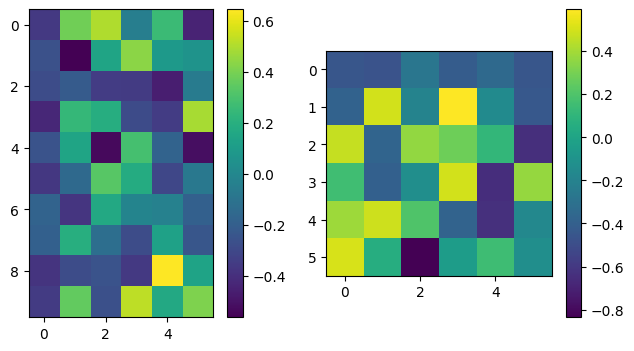

Singular values are:  [4.32151325 1.01957157 0.98751419 0.80804232 0.49544436 0.47226612]


<Figure size 640x480 with 0 Axes>

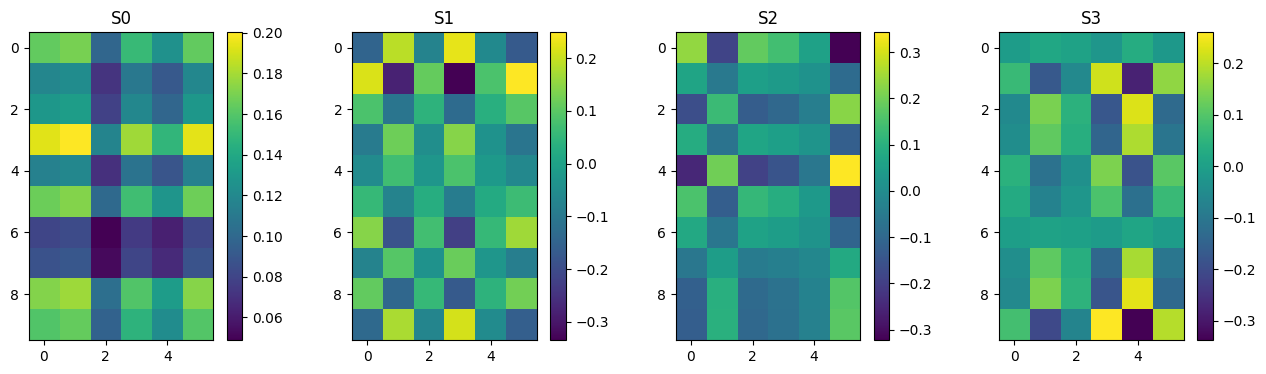

<Figure size 640x480 with 0 Axes>

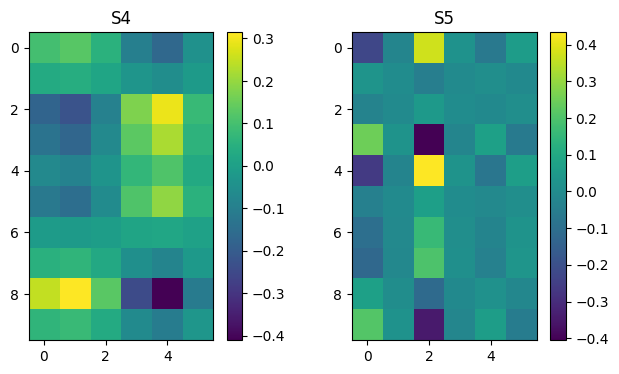

<Figure size 640x480 with 0 Axes>

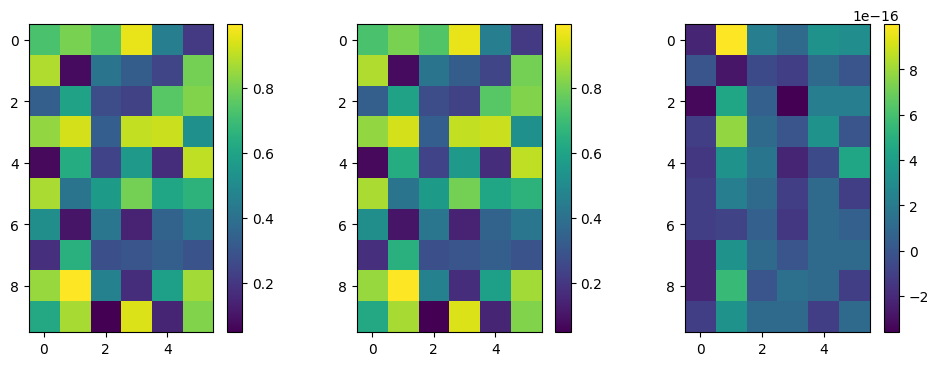

In [3]:
m=10; n=6

A = np.random.rand(m*n).reshape(m,n)

U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)

plot_matrices([U,VT])

print("Singular values are: ", Sdiag)

Ak = np.zeros((n, m, n))

for k in range(n):
    Ak[k] = np.outer(U[:,k], VT[k,:])

plot_matrices(Ak[:],["S%d" % (i,) for i in range(n)])
    
Ar = np.zeros_like(A)
for k in range(n):
    Ar = Ar + Sdiag[k] * Ak[k]

plot_matrices([A, Ar, A-Ar])

<Figure size 640x480 with 0 Axes>

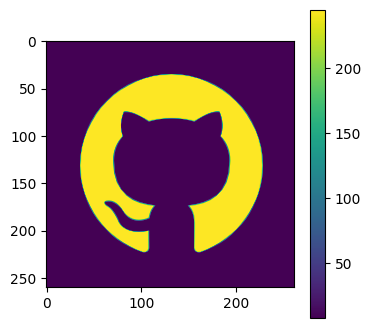

shape =  260 262


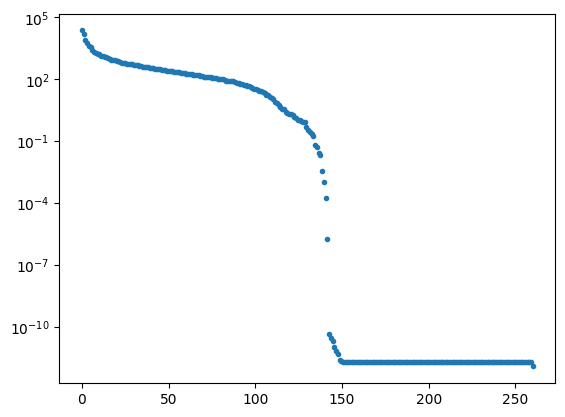

<Figure size 640x480 with 0 Axes>

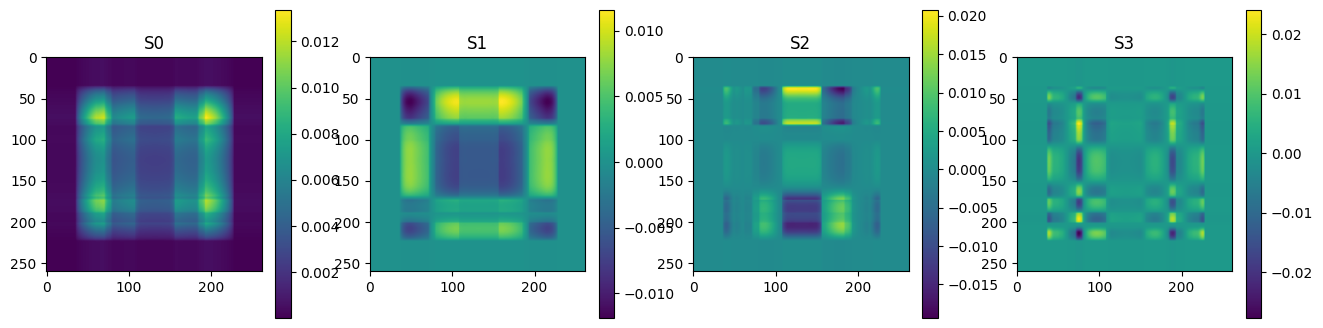

<Figure size 640x480 with 0 Axes>

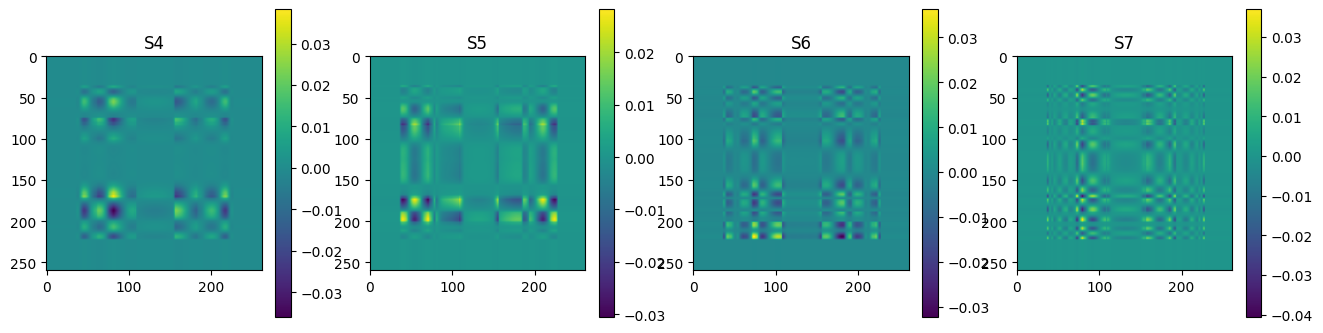

<Figure size 640x480 with 0 Axes>

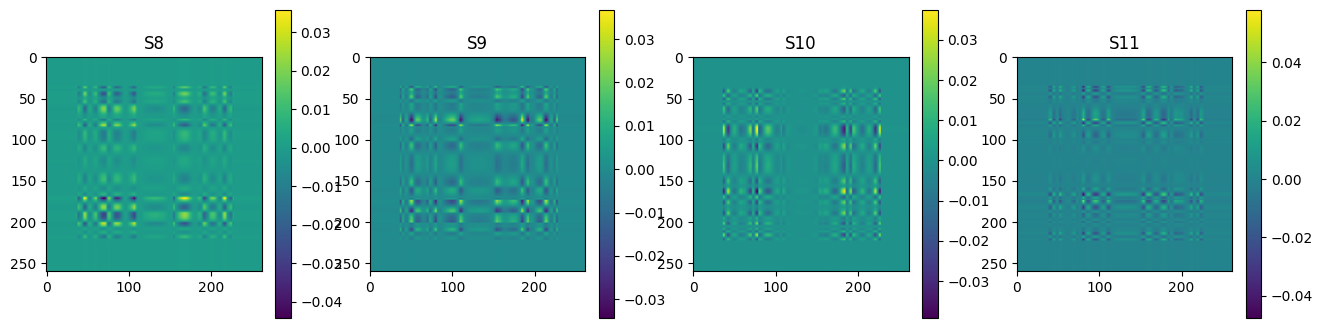

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [4]:
from PIL import Image
 
img = Image.open('github_logo.png')
A = np.asarray(img)[:,:,1]
plot_matrices([A])

m,n = np.shape(A)
print('shape = ', m,n)

U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)
nk = len(Sdiag)

plt.clf()
plt.plot(np.linspace(0,nk,nk),Sdiag,'.')
plt.yscale('log')
plt.show()

Ak = np.zeros((n, m, n))

for k in range(nk):
    Ak[k] = np.outer(U[:,k], VT[k,:])

# plot some of the matrices
plot_matrices(Ak[:12],["S%d" % (i,) for i in range(n)])



<Figure size 640x480 with 0 Axes>

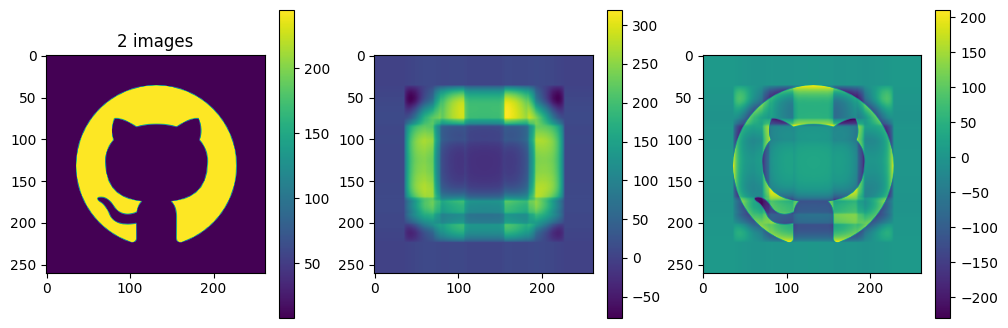

<Figure size 640x480 with 0 Axes>

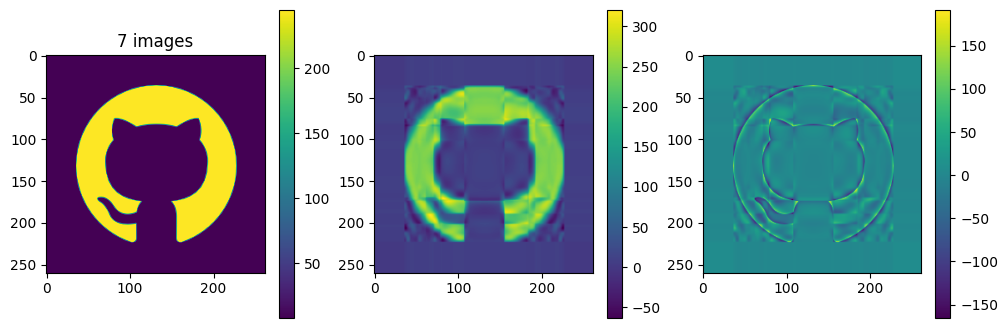

<Figure size 640x480 with 0 Axes>

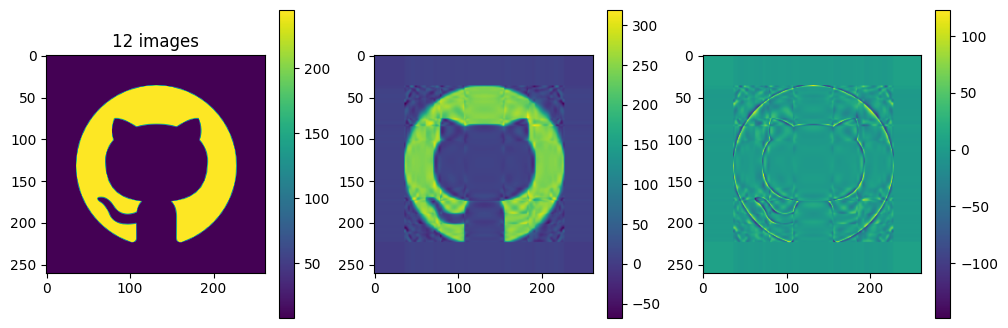

<Figure size 640x480 with 0 Axes>

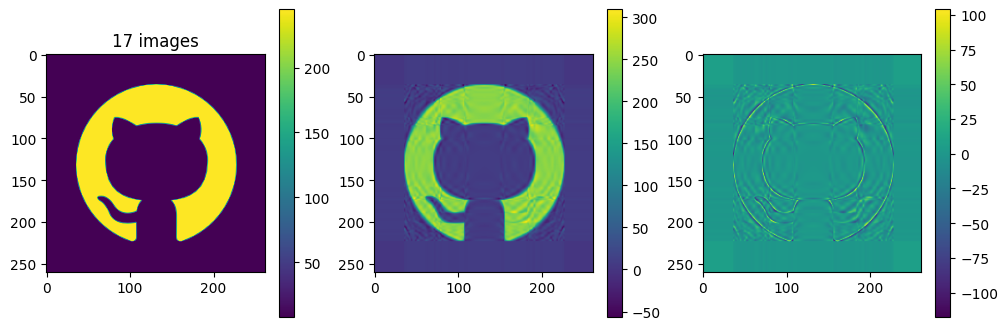

<Figure size 640x480 with 0 Axes>

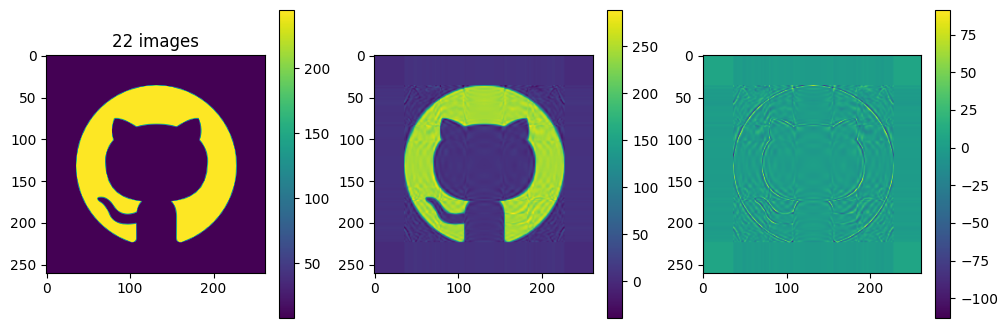

<Figure size 640x480 with 0 Axes>

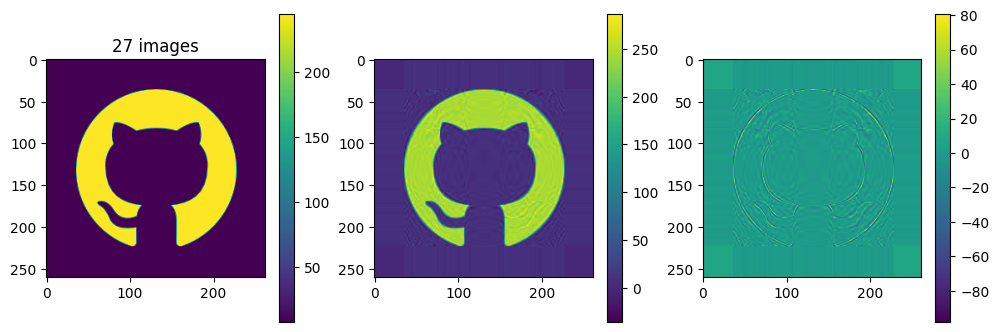

<Figure size 640x480 with 0 Axes>

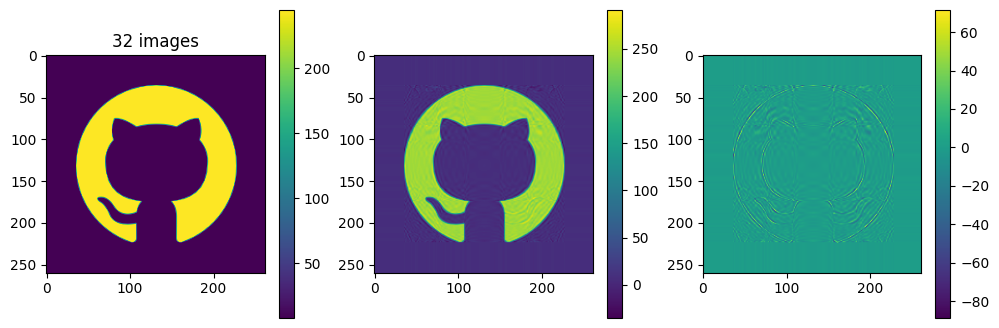

<Figure size 640x480 with 0 Axes>

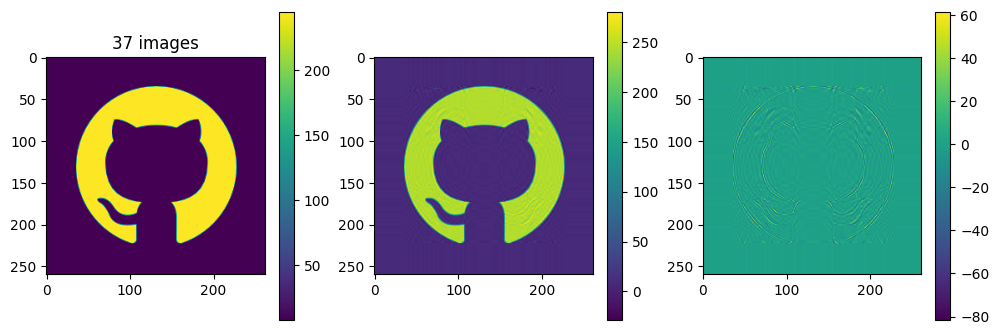

<Figure size 640x480 with 0 Axes>

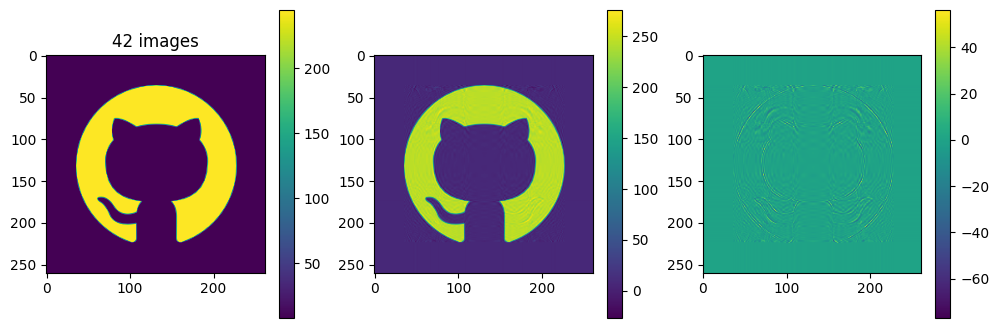

<Figure size 640x480 with 0 Axes>

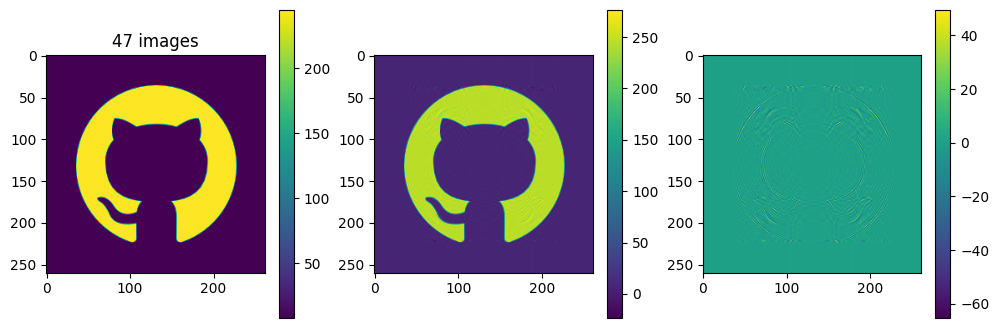

<Figure size 640x480 with 0 Axes>

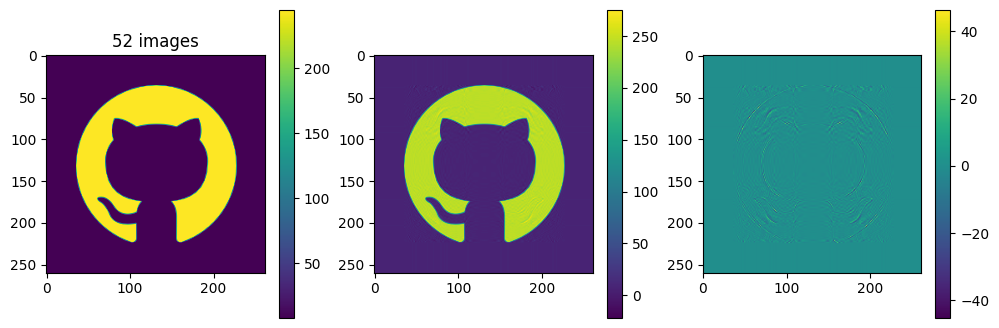

<Figure size 640x480 with 0 Axes>

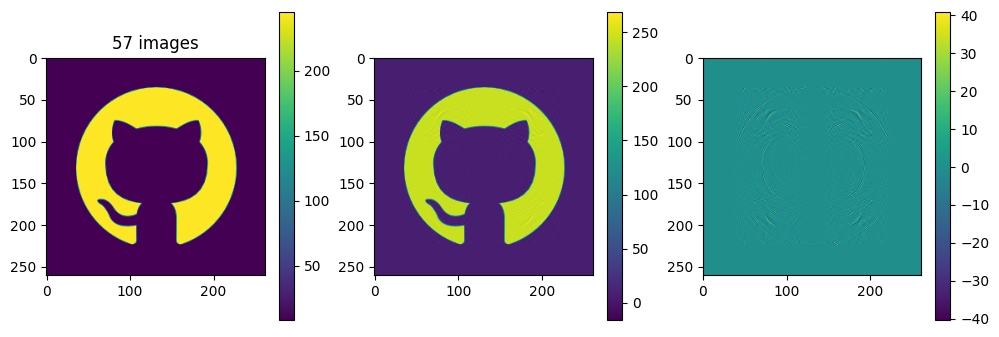

In [5]:
# now show the reconstructed images with different numbers of input matrices
for kmax in range(2,61,5):
    Ar = np.zeros_like(A)
    for k in range(kmax):
        Ar = Ar + Sdiag[k] * Ak[k]
    plot_matrices([A, Ar, A-Ar], titles=["%d images" % (kmax,), "", ""])

In [6]:
print(len(U[:,0]), len(VT[0,:]), nk)

260 262 260


In [7]:
print(20 * (1+260+262), 260*262, (262*260)/(20 * (1+260+262)))

10460 68120 6.512428298279159


Each of the component matrices is constructed from two vectors of length $m$ and $n$, so the total storage is $(m+n)$ for those vectors. If we keep $N$ component matrices, we need $N$ of these vectors and also $N$ singular values, ie. a total of $N(m+n+1)$ numbers. This should be compared to $m\times n$ for the original matrix.

So in this example, it looks like about 20 components gives a reasonable approximation of the image -- so we need $20\times (1+260+262)=10460$ numbers.

The compression factor is therefore $(260\times 262)/10460\approx 6.5$ compared to storing the full $m\times n$ matrix.

## 2. Fitting planetary orbits

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def rv(t, P, a):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = a
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    
    return vel

In [10]:
def rv_model(t, P, a):
    v = rv(t, P, a)
    A =  np.zeros([len(t), len(a)])
    eps = 1e-8
    b = np.copy(a) * (1 + eps)
    v0 = rv(t, P, np.array([b[0],a[1],a[2],a[3],a[4]]))
    v1 = rv(t, P, np.array([a[0],b[1],a[2],a[3],a[4]]))
    v2 = rv(t, P, np.array([a[0],a[1],b[2],a[3],a[4]]))
    v3 = rv(t, P, np.array([a[0],a[1],a[2],b[3],a[4]]))
    v4 = rv(t, P, np.array([a[0],a[1],a[2],a[3],b[4]]))
    A[:, 0] = (v0 - v) / (b[0]-a[0])
    A[:, 1] = (v1 - v) / (b[1]-a[1])
    A[:, 2] = (v2 - v) / (b[2]-a[2])
    A[:, 3] = (v3 - v) / (b[3]-a[3])
    A[:, 4] = (v4 - v) / (b[4]-a[4])
    return v, A

In [11]:
# Observations
# These are for HD145675 from Butler et al. 2003
tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)

# initial guess
# P, mp, e, omega, tp, v0 
P = 1724
a0 = np.array([1.0, 1e-3, 1e-3, 1e-3, 1e-3])

a = a0
err = 1.0
lam = 1e-3
while err > 1e-6:
    v, A = rv_model(tobs, P, a)
    A[:, 0] = A[:, 0] / eobs
    A[:, 1] = A[:, 1] / eobs
    A[:, 2] = A[:, 2] / eobs
    A[:, 3] = A[:, 3] / eobs
    A[:, 4] = A[:, 4] / eobs
    r = (v-vobs)/eobs
    lhs = A.T@A
    lhs = lhs@(np.identity(len(a))*(1+lam))
    rhs = -A.T@r
    da = np.linalg.inv(lhs)@rhs
    # artificially reduce the step to not overshoot e=1
    a1 = a + 0.2*da
    #print(a1, a)
    v1, A1 = rv_model(tobs, P, a1)
    A1[:, 0] = A1[:, 0] / eobs
    A1[:, 1] = A1[:, 1] / eobs
    A1[:, 2] = A1[:, 2] / eobs
    A1[:, 3] = A1[:, 3] / eobs
    A1[:, 4] = A1[:, 4] / eobs
    r1 = (v1-vobs)/eobs
    err = np.sum(r**2)
    err1 = np.sum(r1**2)
    print("err = %lg, a=(%lg, %lg, %lg, %lg, %lg), lam = %lg" % (err1 ,a1[0], a1[1], a1[2], a1[3], a1[4], lam))
    if err1 > err:
        lam = lam * 10
    else:
        lam = lam / 10
        a = a1
        if (err-err1) < 0.1:
            break

print("Best-fit parameters: M = %lg, e = %lg, omega = %lg, tP = %lg, v0 = %lg " % 
      (a[0], a[1], a[2] % np.pi, a[3], a[4]))

err = 27681.8, a=(0.782451, -0.369395, 1.25645, 83.4323, -5.54384), lam = 0.001
err = 20054.1, a=(1.41799, -0.0958655, 3.1723, 397.376, -9.24603), lam = 0.0001
err = 14422.2, a=(2.07504, -0.259971, 4.42914, 762.861, -12.9742), lam = 1e-05
err = 9761.64, a=(2.58825, -0.194585, 3.86685, 619.679, -15.7538), lam = 1e-06
err = 6274.18, a=(3.0306, -0.236762, 3.5061, 522.647, -18.2403), lam = 1e-07
err = 4006.37, a=(3.39172, -0.277748, 3.43951, 504.4, -20.2629), lam = 1e-08
err = 2573.44, a=(3.68319, -0.303122, 3.41861, 498.425, -21.8904), lam = 1e-09
err = 1664.62, a=(3.91746, -0.319699, 3.40947, 495.657, -23.1969), lam = 1e-10
err = 1086.42, a=(4.10537, -0.331101, 3.40482, 494.15, -24.2444), lam = 1e-11
err = 717.823, a=(4.25593, -0.339248, 3.40224, 493.248, -25.0837), lam = 1e-12
err = 482.563, a=(4.37647, -0.345234, 3.40072, 492.673, -25.7561), lam = 1e-13
err = 332.278, a=(4.47295, -0.349724, 3.3998, 492.292, -26.2945), lam = 1e-14
err = 236.222, a=(4.55013, -0.353147, 3.39923, 492.031, 

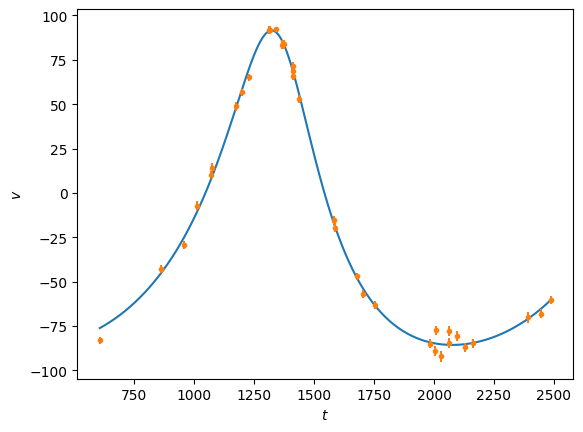

In [12]:
t = np.linspace(tobs[0], tobs[-1], 1000)
plt.plot(t, rv(t,P, a), 'C0')
plt.plot(tobs, vobs, 'C1.')
plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.ylabel(r'$v$')
plt.xlabel(r'$t$')
plt.show()

Note that the eccentricity from the fit comes out negative, this is because of a degeneracy between $e$ and the angles $\omega_P$ and $t_P$. By adjusting these, we can fix the eccentricity to be positive:

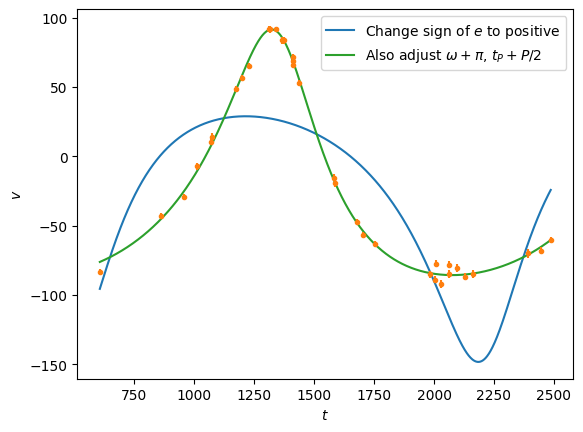

In [13]:
t = np.linspace(tobs[0], tobs[-1], 1000)

# Change the sign of eccentricity
a2 = np.copy(a)
a2[1] = -a[1]
plt.plot(t, rv(t,P, a2), 'C0', label=r'Change sign of $e$ to positive')

a3 = np.copy(a)
a3[1] = -a[1]
a3[3] = (a[3] + P/2) % P
a3[2] = (a[2] + np.pi) % (2*np.pi)

plt.plot(t, rv(t,P, a3), 'C2', label=r'Also adjust $\omega+\pi$, $t_P+P/2$')

plt.plot(tobs, vobs, 'C1.')
plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.ylabel(r'$v$')
plt.legend()
plt.xlabel(r'$t$')
plt.show()

In [14]:
# Calculate the covariance matrix

v, A = rv_model(tobs, P, a3)

A[:, 0] = A[:, 0] / eobs
A[:, 1] = A[:, 1] / eobs
A[:, 2] = A[:, 2] / eobs
A[:, 3] = A[:, 3] / eobs
A[:, 4] = A[:, 4] / eobs

C = np.linalg.inv(A.T@A)

To compare with MCMC, let's regenerate the samples (I copied the code directly from the exercise here: https://andrewcumming.github.io/phys512/metropolis_solutions.html)

In [39]:
seed = 56123
rng = np.random.default_rng(seed)

def f(x, tobs, vobs, eobs):
    chisq = np.sum(((vobs-rv(tobs, P, x))/eobs)**2)
    return -chisq/2

# Observations
# These are for HD145675 from Butler et al. 2003
tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)

# Number of samples to generate
N = 10**5
x = np.zeros((N, 5))

# initial guess
# P, mp, e, omega, tp, v0 
P = 1724
x[0] = [1.0, 0.0, 0.0, 0.0, 0.0]
# and the widths for the jumps
widths = (0.03, 0.03, 0.03, 3.0, 1.0)

count = 0

for i in range(N-1):
    
    # Proposal
    ii = np.random.randint(0, 5)
    x_try = np.copy(x[i])
    x_try[ii] += rng.normal(scale = widths[ii])

    #x_try[2] = (x_try[2]) % 1   # keep e between zero and 1
    
    # Accept the move or stay where we are
    u = rng.uniform()
    if u <= np.exp(f(x_try, tobs,vobs,eobs) - f(x[i], tobs,vobs,eobs)):
        x[i+1] = np.copy(x_try)
        count = count + 1
    else:
        x[i+1] = np.copy(x[i])

print("Acceptance fraction = %g" % (count/N,))

# Reject the burn in phase
x = x[int(0.3*N):]

# Move the angles to within 0 to 2pi
x[:,2] = x[:,2] % (2*np.pi)
x[:,3] = x[:,3] % P

Acceptance fraction = 0.397


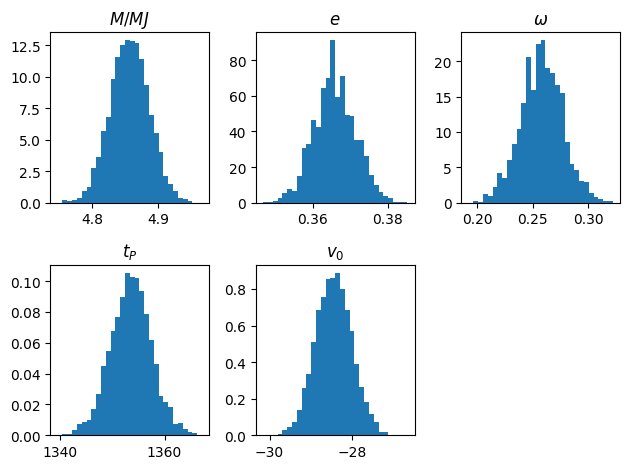

In [40]:
# Plot to make sure everything looks ok

titles = (r'$M/MJ$', r'$e$', r'$\omega$', r'$t_P$', r'$v_0$')
for i, title in enumerate(titles):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.hist(x[:, i], density=True, bins=30)
plt.tight_layout()
plt.show()

In [41]:
# compare with the least squares results
print('%12s %12s %12s %12s %12s %12s' % ('parameter', 'MCMC', 'LS', 'MCMC var', 'LS var', 'frac diff'))
for i in range(5):
    print("%12s %12lg %12lg %12lg %12lg %12lg" % 
          (titles[i], np.mean(x[:,i]), a3[i], np.var(x[:,i]), C[i,i], 
            np.divide(np.var(x[:,i]) - C[i,i], np.var(x[:,i]) + C[i,i])))

   parameter         MCMC           LS     MCMC var       LS var    frac diff
      $M/MJ$      4.85686      4.84971  0.000876622  0.000848462    0.0163244
         $e$     0.365853     0.365386  3.05288e-05  2.87864e-05    0.0293755
    $\omega$      0.25785     0.256843  0.000363071  0.000377849    -0.019946
       $t_P$      1353.59      1353.37       15.499      16.2268   -0.0229407
       $v_0$     -28.4414     -28.4066     0.191926     0.183562    0.0222732


Good agreement! Let's also check the full covariance matrix:

[[ 8.485e-04 -6.036e-05 -5.155e-05 -1.316e-02 -4.161e-03]
 [-6.036e-05  2.879e-05 -8.196e-06 -2.972e-03 -3.427e-04]
 [-5.155e-05 -8.196e-06  3.778e-04  7.299e-02  4.870e-04]
 [-1.316e-02 -2.972e-03  7.299e-02  1.623e+01  6.866e-02]
 [-4.161e-03 -3.427e-04  4.870e-04  6.866e-02  1.836e-01]] 

 [[ 8.766e-04 -6.094e-05 -4.700e-05 -1.214e-02 -4.612e-03]
 [-6.094e-05  3.053e-05 -5.209e-06 -2.498e-03 -3.884e-04]
 [-4.700e-05 -5.209e-06  3.631e-04  6.963e-02  4.159e-04]
 [-1.214e-02 -2.498e-03  6.963e-02  1.550e+01  6.382e-02]
 [-4.612e-03 -3.884e-04  4.159e-04  6.382e-02  1.919e-01]]


<Figure size 640x480 with 0 Axes>

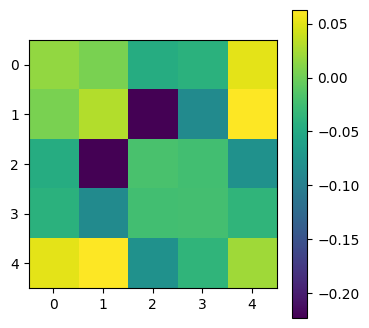

In [42]:
C_mcmc = np.cov(x.T)

with np.printoptions(precision=3, suppress=False):
    print(C,"\n\n",C_mcmc)

plot_matrices([np.divide(C_mcmc-C, C_mcmc+C)])